# First try on solving a DataCamp competition

This is my first try on solving a competitive challenge made by DataCamp.

## 💪 Competition challenge

Create a report that covers the following:  
  1. Which departments are the most/least active?
  2. Which employee has the most connections? 
  3. Identify the most influential departments and employees.
  4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

# I. Imports of data and modules

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# read messages.csv
df_msg = pd.read_csv('../data/messages.csv', parse_dates = ['timestamp'])
df_msg.head(3)

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86


In [3]:
df_msg.shape

(3512, 4)

In [4]:
# read employees.csv
df_emp = pd.read_csv('../data/employees.csv')
df_emp.head(3)

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54


In [5]:
df_emp.shape

(664, 4)

In [6]:
# checking for missing values
df_msg.isnull().sum()

sender            0
receiver          0
timestamp         0
message_length    0
dtype: int64

In [7]:
df_emp.isnull().sum()

id            0
department    0
location      0
age           0
dtype: int64

>  No missing values in both datasets.

# II. Answering the Questions

### 1. Which departments are the most/least active?

1) Getting number of employees per department:

In [8]:
dpt = df_emp['department']
dpt

0       Operations
1            Sales
2               IT
3            Admin
4       Operations
          ...     
659          Admin
660          Admin
661    Engineering
662          Sales
663          Admin
Name: department, Length: 664, dtype: object

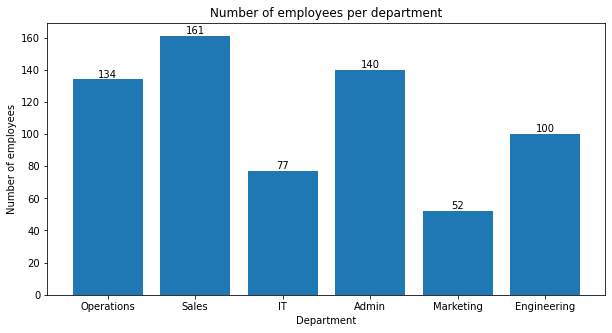

In [9]:
x = Counter(dpt).keys()
y = Counter(dpt).values()
plt.figure(figsize=(10,5))
bars = plt.bar(x, y,)
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('Number of employees per department')
plt.bar_label(bars)
plt.show()

2) Getting number of messages per employee:

In [10]:
sent = df_msg['sender']
msgs_per_emp = Counter(sent)
#msgs_per_emp

3) Getting total number of messages per department:

In [11]:
df_msg_sid = df_msg.rename(columns={'sender':'id'})
df_msg_sid.head(3)

,id,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86


In [12]:
# concatenating both datatframes
#df_all = pd.concat([df_msg_sid, df_emp], axis=1, join="outer")
#df_all.head(3)

df_all = df_msg_sid.merge(df_emp, on='id', how='inner')
df_all

,id,receiver,timestamp,message_length,department,location,age
0,79,48,2021-06-02 05:41:34,88,Sales,France,33
1,79,63,2021-06-02 05:42:15,72,Sales,France,33
2,79,58,2021-06-02 05:44:24,86,Sales,France,33
3,79,70,2021-06-02 05:49:07,26,Sales,France,33
4,79,109,2021-06-02 19:51:47,73,Sales,France,33
...,...,...,...,...,...,...,...
3507,1881,1052,2021-11-18 04:57:00,40,Sales,Germany,57
3508,1879,1520,2021-11-29 07:27:52,22,Engineering,US,40
3509,1879,1543,2021-11-29 07:37:49,17,Engineering,US,40
3510,1879,1520,2021-11-29 07:27:52,58,Engineering,US,40


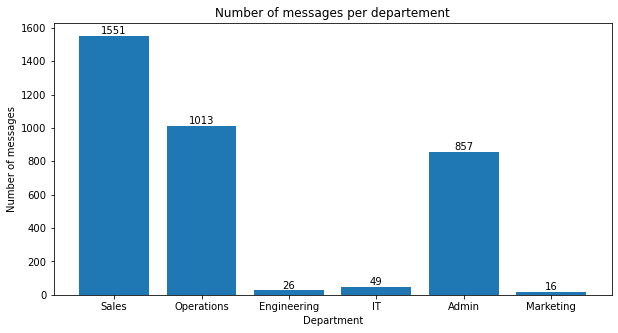

In [13]:
dpt_all = df_all['department']
x2 = Counter(dpt_all).keys()
y2 = Counter(dpt_all).values()
plt.figure(figsize=(10,5))
bars2 = plt.bar(x2, y2,)
plt.xlabel('Department')
plt.ylabel('Number of messages')
plt.title('Number of messages per departement')
plt.bar_label(bars2)
plt.show()

>Most active departments (: Sales (1551)

### 2. Which employee has the most connections?

Idea: barchart representing number of messages received plus number of messages sent stacked onto another and limited to the 10 most collaborative employees.

1) Getting number of unique receivers per sender:

In [29]:
# number of unique reveivers per sender:
num_rec_un = df_all.groupby(['id'])['receiver'].nunique()
pd.Series(num_rec_un)

id
79      11
128     71
144     75
162      5
173      8
        ..
1800     2
1802     1
1807     4
1879     2
1881     5
Name: receiver, Length: 85, dtype: int64

In [22]:
n_receiver = Counter(num_rec_un).keys()
n_receiver

dict_keys([11, 71, 75, 5, 8, 1, 12, 4, 33, 51, 2, 39, 6, 9, 58, 31, 13, 30, 50, 14, 64, 77, 68, 32, 18, 21, 3, 17, 24, 15, 7, 19, 20])

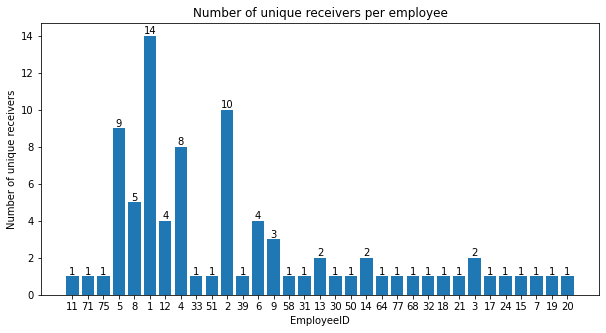

In [24]:

n_receiver = [str(i) for i in list(Counter(num_rec_un).keys())]

emp_ids = list(Counter(num_rec_un).values())
plt.figure(figsize=(10,5))
bars2 = plt.bar(n_receiver, emp_ids, tick_label=n_receiver)
plt.xlabel('EmployeeID')
plt.ylabel('Number of unique receivers')
plt.title('Number of unique receivers per employee')
plt.bar_label(bars2)
plt.show()